In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import numpy as np

In [3]:
ABS2018 = pd.read_csv('ABS_StatsEmployersDemographics/ABSCS2018.AB1800CSA04-2022-08-31T122815.csv')

In [4]:
ABS2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   2017 NAICS code (NAICS2017)                  84 non-null     object
 1   Meaning of NAICS code (NAICS2017_LABEL)      84 non-null     object
 2   Meaning of Sex code (SEX_LABEL)              84 non-null     object
 3   Meaning of Ethnicity code (ETH_GROUP_LABEL)  84 non-null     object
 4   Meaning of Race code (RACE_GROUP_LABEL)      84 non-null     object
 5   Meaning of Veteran code (VET_GROUP_LABEL)    84 non-null     object
 6   Number of employer firms (FIRMPDEMP)         84 non-null     object
 7   Number of employees (EMP)                    84 non-null     object
 8   Annual payroll ($1,000) (PAYANN)             84 non-null     object
dtypes: object(9)
memory usage: 6.0+ KB


In [5]:
ABS2018.columns = [c.replace(' ', '') for c in ABS2018.columns]


In [6]:
ABS2018 = ABS2018[['MeaningofNAICScode(NAICS2017_LABEL)', 'MeaningofSexcode(SEX_LABEL)', 'Numberofemployerfirms(FIRMPDEMP)', 'Numberofemployees(EMP)', 'Annualpayroll($1,000)(PAYANN)']]

In [7]:
ABS2018.head()


,MeaningofNAICScode(NAICS2017_LABEL),MeaningofSexcode(SEX_LABEL),Numberofemployerfirms(FIRMPDEMP),Numberofemployees(EMP),"Annualpayroll($1,000)(PAYANN)"
0,Total for all sectors,Total,"5,722,142","128,196,406","6,937,240,308"
1,Total for all sectors,Female,"1,141,410","10,149,257","388,085,223"
2,Total for all sectors,Male,"3,496,959","45,346,405","2,140,501,692"
3,Total for all sectors,Equally male/female,"860,754","7,970,121","279,853,007"
4,Total for all sectors,Total,"5,722,142","128,196,406","6,937,240,308"


In [8]:
#rename columns

#SalesRevenue and AnnualPayroll measures per $1000 dollars

ABSGENDER = ABS2018.rename(columns={'MeaningofNAICScode(NAICS2017_LABEL)': 'Sector', 'MeaningofSexcode(SEX_LABEL)': 'Gender', 'Numberofemployerfirms(FIRMPDEMP)': 'NumberOfEmployerFirms', 'Numberofemployees(EMP)': 'NumberOfEmployees', 'Annualpayroll($1,000)(PAYANN)': 'AnnualPayroll'})

In [9]:
absEmp = ABSGENDER[['Sector', 'Gender', 'NumberOfEmployees']]

In [10]:
absEq = ABSGENDER[['Sector', 'Gender', 'NumberOfEmployerFirms']]

In [11]:
#remove first row


ABSGENDER.head()

,Sector,Gender,NumberOfEmployerFirms,NumberOfEmployees,AnnualPayroll
0,Total for all sectors,Total,"5,722,142","128,196,406","6,937,240,308"
1,Total for all sectors,Female,"1,141,410","10,149,257","388,085,223"
2,Total for all sectors,Male,"3,496,959","45,346,405","2,140,501,692"
3,Total for all sectors,Equally male/female,"860,754","7,970,121","279,853,007"
4,Total for all sectors,Total,"5,722,142","128,196,406","6,937,240,308"


In [12]:
ABSGENDER.groupby(['Sector', 'Gender']).describe()

NumberOfEmployerFirms  \
                                                                                       count   
Sector                                             Gender                                      
Accommodation and food services                    Equally male/female                     1   
                                                   Female                                  1   
                                                   Male                                    1   
                                                   Total                                   1   
Administrative and support and waste management... Equally male/female                     1   
...                                                                                      ...   
Utilities                                          Total                                   1   
Wholesale trade                                    Equally male/female                     1   
                                                   Female                                  1   
                                                   Male                                    1   
                                                   Total                                   1   

                                                                               \
                                                                       unique   
Sector                                             Gender                       
Accommodation and food services                    Equally male/female      1   
                                                   Female                   1   
                                                   Male                     1   
                                                   Total                    1   
Administrative and support and waste management... Equally male/female      1   
...                                                                       ...   
Utilities                                          Total                    1   
Wholesale trade                                    Equally male/female      1   
                                                   Female                   1   
                                                   Male                     1   
                                                   Total                    1   

                                                                                 \
                                                                            top   
Sector                                             Gender                         
Accommodation and food services                    Equally male/female  108,888   
                                                   Female               108,135   
                                                   Male                 306,519   
                                                   Total                532,009   
Administrative and support and waste management... Equally male/female   50,637   
...                                                                         ...   
Utilities                                          Total                  6,062   
Wholesale trade                                    Equally male/female   41,537   
                                                   Female                43,453   
                                                   Male                 201,980   
                                                   Total                297,105   

                                                                             \
                                                                       freq   
Sector                                             Gender                     
Accommodation and food services                    Equally male/female    1   
                                                   Female                 1   
                                 

In [13]:
GenderSectorPayroll= ABSGENDER[['Sector', 'Gender', 'AnnualPayroll']]

GenderSectorPayroll.head()

,Sector,Gender,AnnualPayroll
0,Total for all sectors,Total,"6,937,240,308"
1,Total for all sectors,Female,"388,085,223"
2,Total for all sectors,Male,"2,140,501,692"
3,Total for all sectors,Equally male/female,"279,853,007"
4,Total for all sectors,Total,"6,937,240,308"


In [14]:
GSP = GenderSectorPayroll

In [15]:
GSP['AnnualPayroll'] = GSP['AnnualPayroll'].str.replace(',', '')

GSP.drop(GSP[GSP['AnnualPayroll'] == "S"].index, inplace = True)


GSP['AnnualPayroll'] = GSP['AnnualPayroll'].astype(str).astype(float).astype('int64')

C:\Users\Logan\AppData\Local\Temp\ipykernel_27592\2033070993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSP['AnnualPayroll'] = GSP['AnnualPayroll'].str.replace(',', '')
C:\Users\Logan\AppData\Local\Temp\ipykernel_27592\2033070993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSP.drop(GSP[GSP['AnnualPayroll'] == "S"].index, inplace = True)
C:\Users\Logan\AppData\Local\Temp\ipykernel_27592\2033070993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [16]:
gspTotal = GSP[GSP.Gender  == "Total"]





gspTotal.head()

,Sector,Gender,AnnualPayroll
0,Total for all sectors,Total,6937240308
4,Total for all sectors,Total,6937240308
8,"Agriculture, forestry, fishing and hunting (660)",Total,11184335
12,"Mining, quarrying, and oil and gas extraction",Total,60692728
16,Utilities,Total,71506415


In [17]:
gspTotal = gspTotal[2:]

In [18]:
gspTotal = gspTotal[['Sector', 'AnnualPayroll']]



In [19]:
gspTotal = gspTotal.set_index('Sector')
gspTotal.head()

,AnnualPayroll
Sector,
"Agriculture, forestry, fishing and hunting (660)",11184335
"Mining, quarrying, and oil and gas extraction",60692728
Utilities,71506415
Construction,424172015
Manufacturing,724009247


Text(0, 0.5, 'Sector')

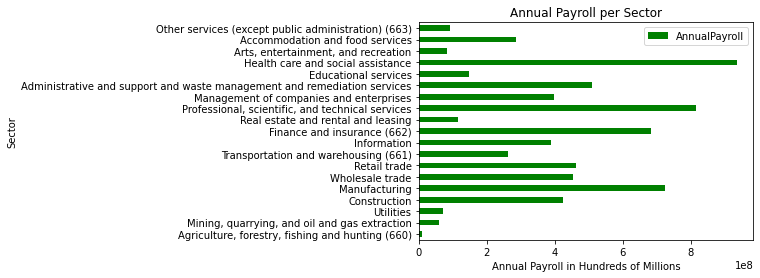

In [20]:
ax = gspTotal.plot(title = 'Annual Payroll per Sector',kind='barh', color = "green")

ax.set_xlabel('Annual Payroll in Hundreds of Millions')
ax.set_ylabel('Sector')

In [21]:
absEmpF = absEmp[absEmp.Gender == 'Female']

In [22]:
absEmpF = absEmpF[2:]


In [23]:
absEmpF['NumberOfEmployees'] = absEmpF['NumberOfEmployees'].str.replace(',', '')
absEmpF['NumberOfEmployees'] = absEmpF['NumberOfEmployees'].astype(str).astype(float).astype('int64')

In [24]:

absEmpF = absEmpF[['Sector', 'NumberOfEmployees']]

In [25]:
absEmpF = absEmpF.set_index('Sector')


absEmpF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Agriculture, forestry, fishing and hunting (660) to Other services (except public administration) (663)
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   NumberOfEmployees  19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes


In [26]:

fig1 = px.bar(absEmpF, title = "Number of Female Employees by Sector, 2018")
fig1.show()

In [28]:
absEq = absEq[absEq.Gender == 'Equally male/female']

In [29]:
absEq['NumberOfEmployerFirms'] = absEq['NumberOfEmployerFirms'].str.replace(',', '')

absEq.drop(absEq[absEq['NumberOfEmployerFirms']== "S"].index, inplace = True)
absEq['NumberOfEmployerFirms'] = absEq['NumberOfEmployerFirms'].astype(str).astype(float).astype('int64')
absEq.head()

,Sector,Gender,NumberOfEmployerFirms
3,Total for all sectors,Equally male/female,860754
7,Total for all sectors,Equally male/female,860754
11,"Agriculture, forestry, fishing and hunting (660)",Equally male/female,5605
15,"Mining, quarrying, and oil and gas extraction",Equally male/female,3280
23,Construction,Equally male/female,100260


In [30]:
absEq = absEq[['Sector', 'NumberOfEmployerFirms']]

#absEq = absEq.set_index('Sector')
absEq = absEq[2:]

In [31]:

fig2 = px.pie(absEq, values="NumberOfEmployerFirms", names = "Sector", title ="Percentage of Total Gender-Equal Firms By Sector")

fig2.show()